In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


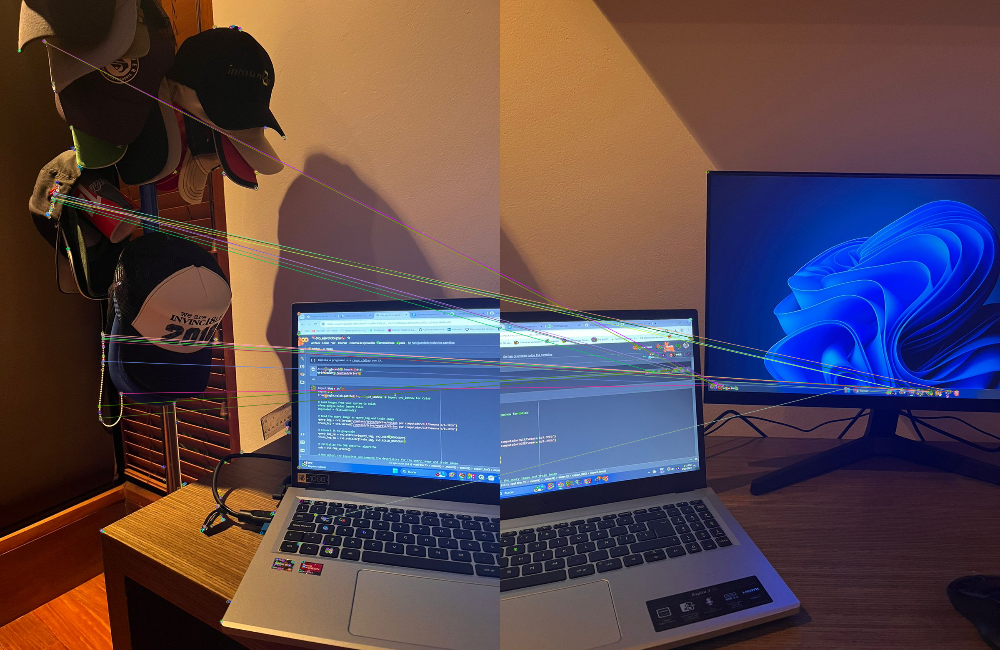

In [2]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab

# Load images from your system to Colab
#from google.colab import files
#uploaded = files.upload()

# Read the query image as query_img and train image
query_img = cv2.imread('/content/drive/MyDrive/VisionAgricultura/6to/1ima.jpeg')
train_img = cv2.imread('/content/drive/MyDrive/VisionAgricultura/6to/2ima.jpeg')

# Convert it to grayscale
query_img_bw = cv2.cvtColor(query_img, cv2.COLOR_BGR2GRAY)
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector algorithm
orb = cv2.ORB_create()

# Now detect the keypoints and compute the descriptors for the query image and train image
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw, None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw, None)

# Initialize the Matcher for matching the keypoints and then match the keypoints
matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors, trainDescriptors)

# draw the matches to the final image containing both the images
final_img = cv2.drawMatches(query_img, queryKeypoints, train_img, trainKeypoints, matches[:20], None)
final_img = cv2.resize(final_img, (1000, 650))

# Show the final image in Colab
cv2_imshow(final_img)
cv2.waitKey(0)
cv2.destroyAllWindows()


Not enough matches are found - 6/10


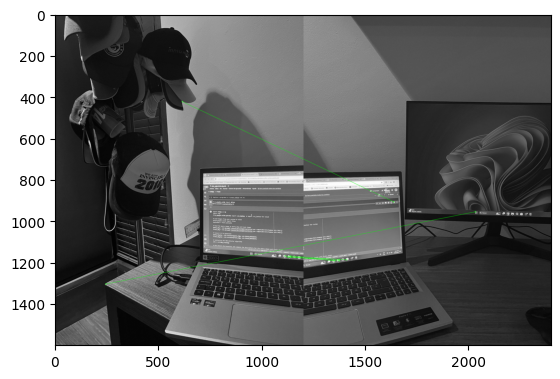

In [4]:
import numpy as np
import cv2 as cv
from matplotlib import pyplot as plt

MIN_MATCH_COUNT = 10

img1 = cv.imread('/content/drive/MyDrive/VisionAgricultura/6to/1ima.jpeg', cv.IMREAD_GRAYSCALE)     # queryImage
img2 = cv.imread('/content/drive/MyDrive/VisionAgricultura/6to/2ima.jpeg', cv.IMREAD_GRAYSCALE)  # trainImage

# Initiate ORB detector
orb = cv.ORB_create()

# find the keypoints and descriptors with ORB
kp1, des1 = orb.detectAndCompute(img1, None)
kp2, des2 = orb.detectAndCompute(img2, None)

# BFMatcher with default params
bf = cv.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append(m)

if len(good) > MIN_MATCH_COUNT:
    src_pts = np.float32([kp1[m.queryIdx].pt for m in good]).reshape(-1, 1, 2)
    dst_pts = np.float32([kp2[m.trainIdx].pt for m in good]).reshape(-1, 1, 2)

    # find Homography
    M, mask = cv.findHomography(src_pts, dst_pts, cv.RANSAC, 5.0)
    matchesMask = mask.ravel().tolist()

    h, w = img1.shape
    pts = np.float32([[0, 0], [0, h - 1], [w - 1, h - 1], [w - 1, 0]]).reshape(-1, 1, 2)
    dst = cv.perspectiveTransform(pts, M)

    img2 = cv.polylines(img2, [np.int32(dst)], True, 255, 3, cv.LINE_AA)
else:
    print("Not enough matches are found - %d/%d" % (len(good), MIN_MATCH_COUNT))
    matchesMask = None

# Draw matches
draw_params = dict(matchColor=(0, 255, 0),  # draw matches in green color
                   singlePointColor=None,
                   matchesMask=matchesMask,  # draw only inliers
                   flags=2)

img3 = cv.drawMatches(img1, kp1, img2, kp2, good, None, **draw_params)

plt.imshow(img3, 'gray')
plt.show()


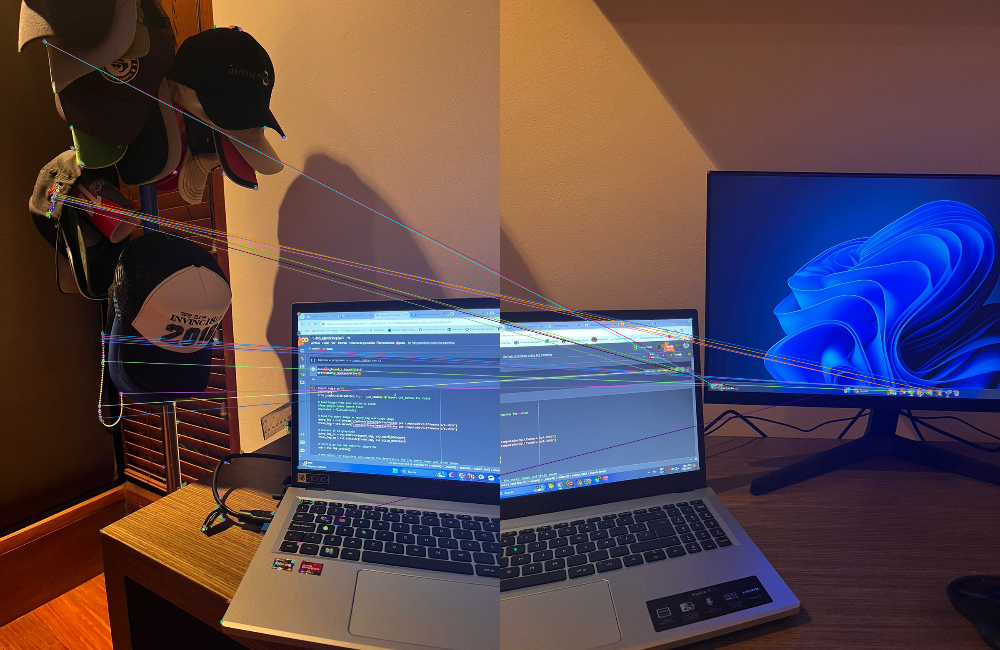

Stitching wasn't successful


AttributeError: 'NoneType' object has no attribute 'clip'

In [5]:
import cv2
from google.colab.patches import cv2_imshow  # Import cv2_imshow for Colab

# Read the images
query_img = cv2.imread('/content/drive/MyDrive/VisionAgricultura/6to/1ima.jpeg')
train_img = cv2.imread('/content/drive/MyDrive/VisionAgricultura/6to/2ima.jpeg')

# Convert them to grayscale
query_img_bw = cv2.cvtColor(query_img, cv2.COLOR_BGR2GRAY)
train_img_bw = cv2.cvtColor(train_img, cv2.COLOR_BGR2GRAY)

# Initialize the ORB detector algorithm
orb = cv2.ORB_create()

# Now detect the keypoints and compute the descriptors for the query image and train image
queryKeypoints, queryDescriptors = orb.detectAndCompute(query_img_bw, None)
trainKeypoints, trainDescriptors = orb.detectAndCompute(train_img_bw, None)

# Initialize the Matcher for matching the keypoints and then match the keypoints
matcher = cv2.BFMatcher()
matches = matcher.match(queryDescriptors, trainDescriptors)

# Draw the matches to the final image containing both the images
final_img = cv2.drawMatches(query_img, queryKeypoints, train_img, trainKeypoints, matches[:20], None)
final_img = cv2.resize(final_img, (1000, 650))

# Show the final image with matches in Colab
cv2_imshow(final_img)
cv2.waitKey(0)
cv2.destroyAllWindows()

# Now, proceed to the stitching part to create the panorama

# Initialize a list of images
imgs = [query_img, train_img]

# Create a Stitcher object
stitcher = cv2.Stitcher.create()

# Stitch the images together
status, output = stitcher.stitch(imgs)

if status != cv2.Stitcher_OK:
    # Check if the stitching procedure is successful
    print("Stitching wasn't successful")
else:
    print('Ready!!!')

# Show the final output
cv2_imshow(output)
